In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_excel(r"D:\ML\emg_dataset.xlsx")
print(data.shape)

(2999, 6)


In [27]:
data.head()

,emg1,emg2,emg3,emg4,emg5,output
0,152,152,150,150,150,allclose
1,148,148,146,146,144,allclose
2,142,140,140,138,136,allclose
3,136,136,134,132,132,allclose
4,128,128,128,128,128,allclose


In [28]:
data["output"].value_counts()

output
allclose        500
allopen         500
index_close     500
middle_close    500
pinky_close     500
ring_close      499
Name: count, dtype: int64

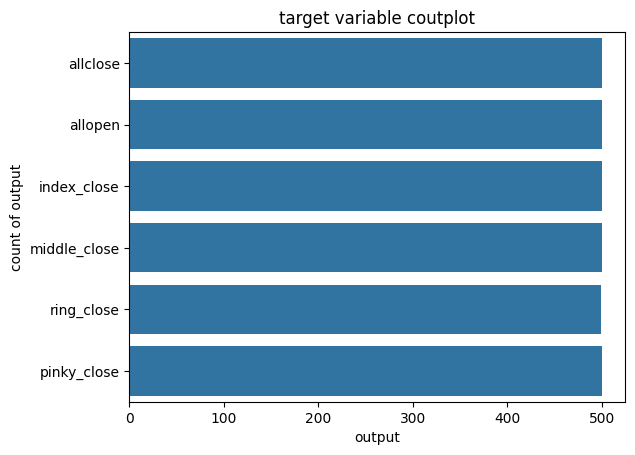

In [29]:
sns.countplot(data["output"])
plt.xlabel("output")
plt.ylabel("count of output")
plt.title("target variable coutplot")
plt.show()

In [30]:
X=data.iloc[:,[0,1,2,3,4]].values
y=data.iloc[:,-1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=99)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [33]:
model.feature_importances_

array([0.23170302, 0.16112254, 0.19786321, 0.22147723, 0.18783399])

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array(['allclose', 'allopen', 'allopen', 'allclose', 'ring_close',
       'ring_close', 'pinky_close', 'index_close', 'index_close',
       'allopen', 'allclose', 'index_close', 'index_close', 'allopen',
       'index_close', 'allopen', 'allopen', 'allclose', 'ring_close',
       'allclose', 'index_close', 'allopen', 'pinky_close', 'allclose',
       'allopen', 'pinky_close', 'middle_close', 'ring_close', 'allopen',
       'pinky_close', 'pinky_close', 'pinky_close', 'allopen',
       'index_close', 'pinky_close', 'allclose', 'pinky_close',
       'allclose', 'index_close', 'index_close', 'index_close',
       'index_close', 'ring_close', 'pinky_close', 'allclose',
       'pinky_close', 'ring_close', 'index_close', 'pinky_close',
       'allclose', 'pinky_close', 'index_close', 'index_close',
       'allclose', 'ring_close', 'index_close', 'index_close', 'allopen',
       'allclose', 'allopen', 'index_close', 'allclose', 'allclose',
       'allopen', 'index_close', 'allopen', 'allclose

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[123,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   3,   0],
       [  0,   0,  88,   0,  17,   0],
       [  3,   5,  29,   8,  36,  48],
       [  0,  26,  49,   0,  43,   5],
       [  0,   0,  25,   4,  14,  87]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.648

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=20)

array([0.6460177 , 0.63716814, 0.69026549, 0.65486726, 0.66371681,
       0.59292035, 0.66371681, 0.65486726, 0.67256637, 0.58035714,
       0.64285714, 0.66964286, 0.66071429, 0.66964286, 0.64285714,
       0.64285714, 0.63392857, 0.64285714, 0.70535714, 0.66071429])